In [1]:
# automatically apply changes in netgen
%reload_ext autoreload
%autoreload 2

In [2]:
from time import sleep
import math
import random
# allows performing command-line operations from within Python
from subprocess import call, Popen

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

# import the netgen
import netgen as ng

In [42]:
ng.setDirectory("Downloads/cbgt_300ms/testdir3")
#ng.setDirectory("/Users/CatiVich/Documents/GitHub/continuous02")
#ng.setDirectory("continuous03")
t           = 0
stim        = 2.9 # 2.52 # 2.7 #
preset_dict = [{'cxd': {'dest': [0, 1], 'mult': [1, 1], 'src': [0, 1]}, #[1.0325, 0.96]
             'cxi': {'dest': [0, 1], 'mult': [1.0, 1.0], 'src': [0, 1]}}]


Choices     =    2
BaseStim    =    [0.00]
Dynamic     =    [30.0]
Start       =    500
popscale    =    0.3

GPiExtEff   =   5.925
STNExtEff   =   1.6    #2.59    #1.59
STNExtFreq  =   1.195  #0.445

CxSTR      =    0.25    #0.0025
CxTh       =    0.05    #0.003   #0.015
CxFSI      =    0.02    #0.2
ThSTR      =    [0.0375] # 0.375
ThCx       =    0.001   #0.01

sweepcount = ng.configureSweep(0, experiment='mc', preset=preset_dict,
                                Start=Start, popscale=popscale,
                                BaseStim=BaseStim,
                                WrongStim=stim, RightStim=stim,
                                Dynamic=Dynamic,  Choices=Choices,
                                CxSTR=CxSTR, GPiExtEff=GPiExtEff,
                                STNExtEff=STNExtEff, STNExtFreq=STNExtFreq,
                                CxFSI=CxFSI, CxTh=CxTh, ThSTR=ThSTR,
                                ThCx=ThCx, rampingCTX=True)
sweepcount

1

In [43]:
ng.compileAndRunSweep(1,0,sweepcount)

In [50]:
results = ng.readAllTrialResults(8,0,sweepcount,['popfreqs','popweights','popQ1s','popQ2s','dopamine', 'popEs'])

In [51]:
decisions = []
for sn in range(sweepcount):
    decisions.append([])
    for result in results[sn]:
        decisions[sn].append(ng.findOutputs2(result)['decisions'])
#decisions

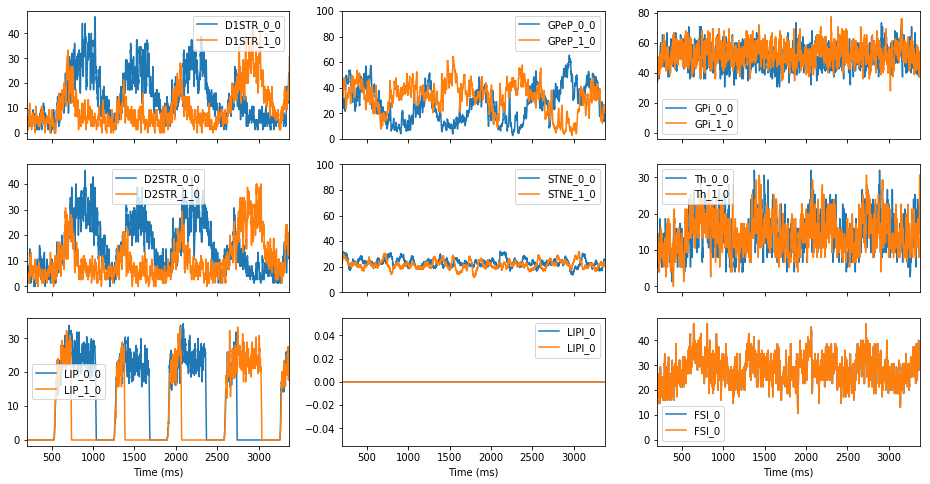

In [52]:
result = results[0][0]

f, (ax1, ax2, ax3) = plt.subplots(3, 3, figsize=(16,8), sharex=True)
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPeP_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='GPi_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax3[0])
    result['popfreqs'].plot(x='Time (ms)', y='LIPI_0', ax=ax3[1])
    result['popfreqs'].plot(x='Time (ms)', y='FSI'+'_0', ax=ax3[2])

for ax, axx, axxx in zip(ax1, ax2, ax3):
    ax.set_xlim(200, ax.get_xlim()[-1])#(750,900)#
    axx.set_xlim(200, axx.get_xlim()[-1])#(750,900)#
    axxx.set_xlim(200, axxx.get_xlim()[-1])#(750,900)#

ax2[1].set_ylim(0,100)
ax1[1].set_ylim(0,100)

plt.savefig('FR_ramping.png', dpi=400)

accuracy overall: 0.6
first 15: 0.6
everything else: nan


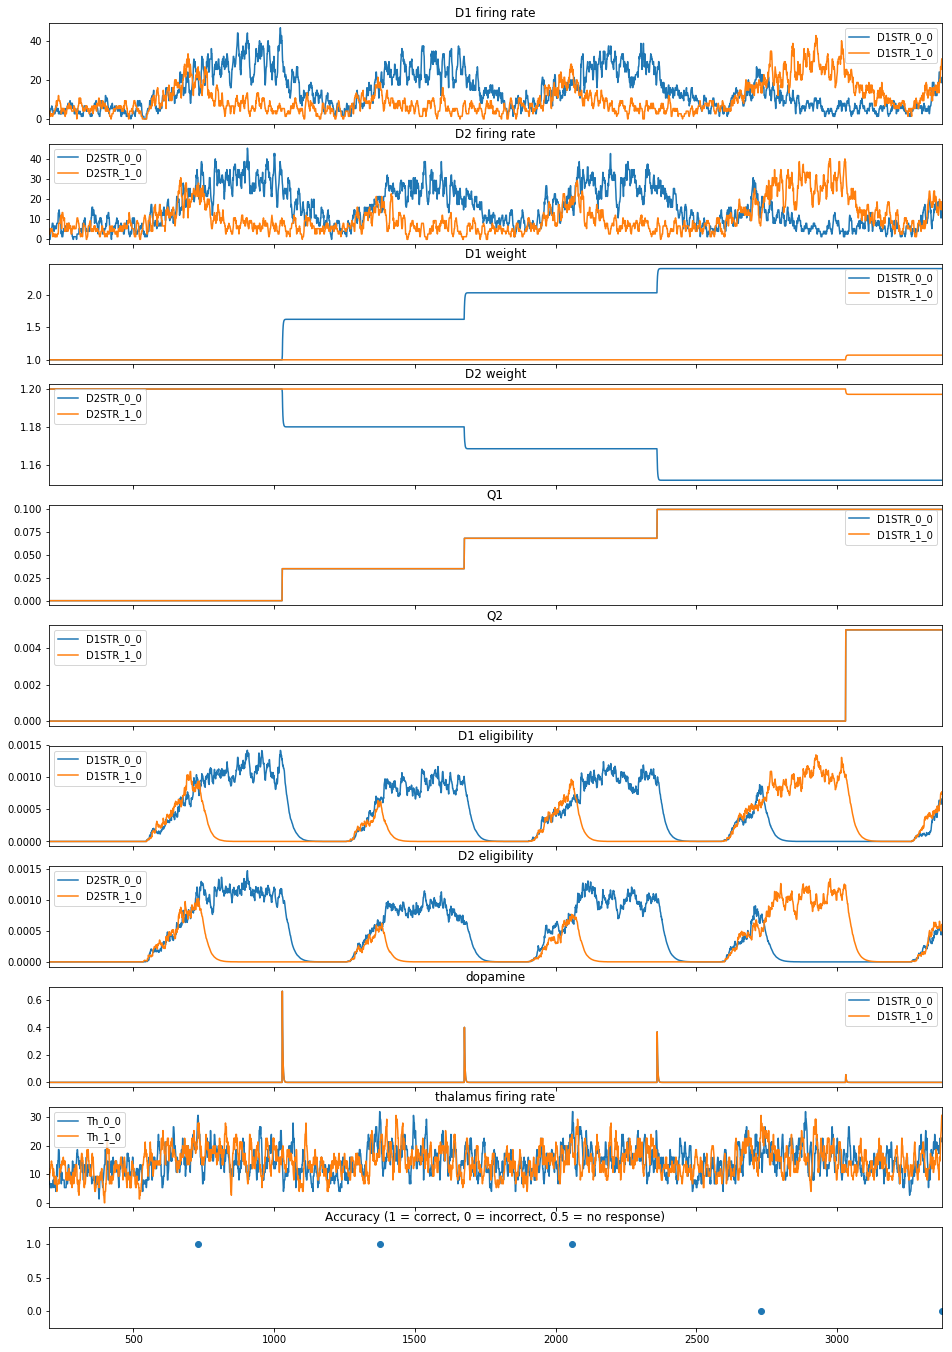

In [53]:
simnum = 0

result = results[0][simnum]

stagecount = len(decisions[0][0])
reacttimes = []
reactions = []
allreactions = []
for i in range(0, stagecount):
    if decisions[0][simnum][i]['pathvals'] != None and len(decisions[0][simnum][i]['pathvals']) > 0:
        reactions.append(1-decisions[0][simnum][i]['pathvals'][0])
    else:
        reactions.append(0.5)
    reacttimes.append(decisions[0][simnum][i]['time'])
#print(reactions)
#print('accuracy overal: ' + str(np.mean(reactions)))

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(11, 1, figsize=(16,24), sharex=True)
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax1, title='D1 firing rate')
    result['popfreqs'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax2, title='D2 firing rate')
    result['popweights'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax3, title='D1 weight')
    result['popweights'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax4, title='D2 weight')
    result['popQ1s'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax5, title='Q1')
    result['popQ2s'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax6, title='Q2')
    result['popEs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax7, title='D1 eligibility')
    result['popEs'].plot(x='Time (ms)', y='D2STR_'+str(i)+'_0', ax=ax8, title='D2 eligibility')
    result['dopamine'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax9, title='dopamine')
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax10, title='thalamus firing rate')
    

ax1.set_xlim(200, ax.get_xlim()[-1])#(250,750)#(2500,2750)#(750,1200)#(750,1000)#(200, ax.get_xlim()[-1])#
ax2.set_xlim(200, ax.get_xlim()[-1])#(250,750)#(2500,2750)#(750,1200)#(750,1000)#(200, ax.get_xlim()[-1])#
#ax1.set_xlim(0, 1000)#(250,750)#
#ax2.set_xlim(0, 1000)#(250,750)#



ax11.plot(reacttimes,reactions, marker='o', linestyle='None')
ax11.set_title('Accuracy (1 = correct, 0 = incorrect, 0.5 = no response)')
ax11.set_ylim(-0.25,1.25)

#ax3.set_ylim(.995,1.0025)

print('accuracy overall: ' + str(np.mean(reactions)))
print('first 15: ' + str(np.mean(reactions[:15])))
print('everything else: ' + str(np.mean(reactions[15:])))

#plt.savefig('/home/mclapp/Desktop/90_10_prob_feeback.png', dpi=400)
plt.savefig('test.png', dpi=400)

In [54]:
reacttimes

[729.02606, 1374.9584, 2059.7913, 2729.6277, 3371.471]

In [21]:
results[0][0]

{'dims': {'brain': 1, 'choices': 2},
 'poppaths': {'FSI': ['brain'],
  'LIPI': ['brain'],
  'GPi': ['choices', 'brain'],
  'STNE': ['choices', 'brain'],
  'GPeP': ['choices', 'brain'],
  'D1STR': ['choices', 'brain'],
  'D2STR': ['choices', 'brain'],
  'LIP': ['choices', 'brain'],
  'Th': ['choices', 'brain']},
 'popcopylist': [{'name': 'FSI',
   'data': {'N': 75.0,
    'C': 0.2,
    'Taum': 10,
    'RestPot': -70,
    'ResetPot': -55,
    'Threshold': -50,
    'RestPot_ca': -85,
    'Alpha_ca': 0.5,
    'Tau_ca': 80,
    'Eff_ca': 0.0,
    'tauhm': 20,
    'tauhp': 100,
    'V_h': -60,
    'V_T': 120,
    'g_T': 0},
   'receptors': {'GABA': {'Tau': 5,
     'RevPot': -70,
     'FreqExt': 0,
     'FreqExtSD': 0,
     'MeanExtEff': 0,
     'MeanExtCon': 0},
    'AMPA': {'Tau': 2,
     'RevPot': 0,
     'FreqExt': 3.0,
     'FreqExtSD': 0,
     'MeanExtEff': 1.55,
     'MeanExtCon': 800},
    'NMDA': {'Tau': 100,
     'RevPot': 0,
     'FreqExt': 0,
     'FreqExtSD': 0,
     'MeanExtEff':

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

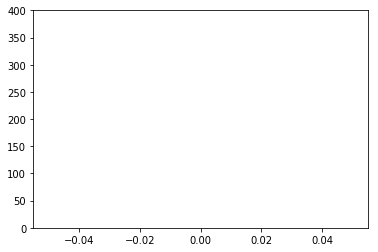

In [59]:
stagecount = len(decisions[0][0])
reactions = []
for i in range(0, stagecount):
    thesereacts = []
    for j in range(0, len(decisions[0])):
        if decisions[0][j][i]['delay'] != None:
            thesereacts.append(decisions[0][j][i]['delay'])
    reactions.append(thesereacts)
meanreact = [np.mean(i) for i in reactions]
stdreact = [np.std(i) for i in reactions]
upreact = [meanreact[i]+stdreact[i] for i in range(0,len(meanreact))]
lwreact = [meanreact[i]-stdreact[i] for i in range(0,len(meanreact))]
plt.plot(meanreact)
plt.ylim(0,400)
np.mean(meanreact)

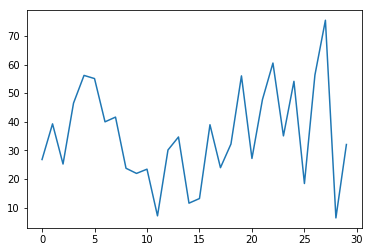

In [2347]:
plt.plot(stdreact)

0.7426984126984129

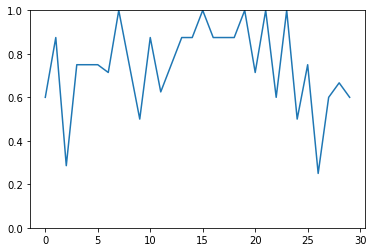

In [2348]:
stagecount = len(decisions[0][0])
reactions = []
for i in range(0, stagecount):
    thesereacts = []
    for j in range(0, len(decisions[0])):
        if decisions[0][j][i]['pathvals'] != None and len(decisions[0][j][i]['pathvals']) > 0:
            thesereacts.append(1-decisions[0][j][i]['pathvals'][0])
    reactions.append(thesereacts)
meanreact = [np.mean(i) for i in reactions]
stdreact = [np.std(i)/math.sqrt(len(i)) for i in reactions]
upreact = [meanreact[i]+stdreact[i] for i in range(0,len(meanreact))]
lwreact = [meanreact[i]-stdreact[i] for i in range(0,len(meanreact))]
plt.plot(meanreact)
plt.ylim(0,1)
#plt.plot(upreact)
#plt.plot(lwreact)
np.mean(meanreact)

In [2316]:

np.mean(meanreact[:10])

0.8083333333333332

In [2317]:
np.mean(meanreact[10:])

0.825

In [2235]:
np.mean(meanreact[:1])

0.6